# Introduction à la librairie **xarray**
# Ecole d'été GGOSSS-2025
## Atelier animé par: F.Assene
![ggosss](https://static.wixstatic.com/media/c030d3_ea7eb8d8e7524f02a790584333376eb9~mv2.png/v1/fill/w_1200,h_630,al_c/c030d3_ea7eb8d8e7524f02a790584333376eb9~mv2.png)
![xarray](https://docs.xarray.dev/en/stable/_static/logos/Xarray_Logo_RGB_Final.png)

In [2]:
import xarray as xr

import warnings
warnings.filterwarnings('ignore')

In [4]:
sst = xr.open_dataset('data/SST_golfe_guinee_Tc.nc')
sst

<xarray.Dataset> Size: 369MB
Dimensions:       (time: 15639, bnds: 2, lon: 92, lat: 64)
Coordinates:
  * time          (time) datetime64[ns] 125kB 1981-09-01 ... 2024-08-06
  * lon           (lon) float32 368B -7.875 -7.625 -7.375 ... 14.38 14.62 14.88
  * lat           (lat) float32 256B -6.875 -6.625 -6.375 ... 8.375 8.625 8.875
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) object 250kB ...
    lon_bnds      (lon, bnds) float32 736B ...
    lat_bnds      (lat, bnds) float32 512B ...
    analysed_sst  (time, lat, lon) float32 368MB ...
Attributes: (12/49)
    CDI:                        Climate Data Interface version 2.4.0 (https:/...
    Conventions:                CF-1.6,ACDD-1.3
    source:                     AVHRR_Pathfinder-NODC-L3C-v5.1,ICOADS_SHIP-NC...
    institution:                NCEI
    product_version:            Version 2.0
    spatial_resolution:         0.25 degree
    ...                         ...
    standard_name_vocabulary:   CF Standard Name Table v29
    summary:                    NOAA's 1/4-degree Daily Optimum Interpolation...
    time_coverage_start:        19810901T000000Z
    time_coverage_end:          19810902T000000Z
    uuid:                       39832cc3-d409-438a-820e-2bb1b38ebca8
    CDO:                        Climate Data Operators version 2.4.0 (https:/...

In [6]:
data = xr.open_dataset('data/GG_cmems_concat_jan_fevrier.nc')
data  # xarray.Dataset

#temp = data.thetao # xarray.DataArray
#temp

<xarray.Dataset> Size: 727MB
Dimensions:    (time: 59, longitude: 265, latitude: 157, depth: 18)
Coordinates:
  * time       (time) datetime64[ns] 472B 2020-01-01 2020-01-02 ... 2020-02-29
  * longitude  (longitude) float32 1kB -10.0 -9.917 -9.833 ... 11.83 11.92 12.0
  * latitude   (latitude) float32 628B -6.0 -5.917 -5.833 ... 6.833 6.917 7.0
  * depth      (depth) float32 72B 0.494 1.541 2.646 3.819 ... 34.43 40.34 47.37
Data variables:
    uo         (time, depth, latitude, longitude) float32 177MB ...
    vo         (time, depth, latitude, longitude) float32 177MB ...
    thetao     (time, depth, latitude, longitude) float32 177MB ...
    so         (time, depth, latitude, longitude) float32 177MB ...
    mlotst     (time, latitude, longitude) float32 10MB ...
    zos        (time, latitude, longitude) float32 10MB ...
Attributes:
    CDI:                       Climate Data Interface version 2.4.0 (https://...
    Conventions:               CF-1.4
    source:                    MERCATOR GLORYS12V1
    institution:               MERCATOR OCEAN
    references:                http://www.mercator-ocean.fr
    history:                   Fri Aug 22 16:50:02 2025: cdo cat GG_cmems_dat...
    title:                     daily mean fields from Global Ocean Physics An...
    comment:                   CMEMS product
    copernicusmarine_version:  2.0.1
    CDO:                       Climate Data Operators version 2.4.0 (https://...

In [71]:
import numpy as np
np.arange(4,20.1)

array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.,
       17., 18., 19., 20.])

In [39]:
data.thetao.sel(time='2020-01-01')

argo = data.thetao.sel(longitude=[4,10,11],latitude=[3,-5,5])

data.thetao.isel(longitude=[0,2])
data.thetao.isel(longitude=np.arange(0,20.1),)

#argo.values

<xarray.DataArray 'thetao' (depth: 18, latitude: 157, longitude: 265)> Size: 3MB
[748890 values with dtype=float32]
Coordinates:
    time       datetime64[ns] 8B 2020-01-01
  * longitude  (longitude) float32 1kB -10.0 -9.917 -9.833 ... 11.83 11.92 12.0
  * latitude   (latitude) float32 628B -6.0 -5.917 -5.833 ... 6.833 6.917 7.0
  * depth      (depth) float32 72B 0.494 1.541 2.646 3.819 ... 34.43 40.34 47.37
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Temperature
    units:          degrees_C
    unit_long:      Degrees Celsius

In [67]:
mytime = sst.analysed_sst.sel(time=slice('2001','2015-04'))

time = mytime.time
time

<xarray.DataArray 'time' (time: 5230)> Size: 42kB
array(['2001-01-01T00:00:00.000000000', '2001-01-02T00:00:00.000000000',
       '2001-01-03T00:00:00.000000000', ..., '2015-04-28T00:00:00.000000000',
       '2015-04-29T00:00:00.000000000', '2015-04-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 42kB 2001-01-01 2001-01-02 ... 2015-04-30
Attributes:
    standard_name:  time
    long_name:      reference time of sst field
    bounds:         time_bnds
    axis:           T

In [ ]:
data.thetao
data['thetao']

In [48]:
temp.to_netcdf('Temperature_cmems.nc')

In [94]:
#data.uo.mean(['time'])
data.diff('time')


<xarray.Dataset> Size: 714MB
Dimensions:    (time: 58, longitude: 265, latitude: 157, depth: 18)
Coordinates:
  * time       (time) datetime64[ns] 464B 2020-01-02 2020-01-03 ... 2020-02-29
  * longitude  (longitude) float32 1kB -10.0 -9.917 -9.833 ... 11.83 11.92 12.0
  * latitude   (latitude) float32 628B -6.0 -5.917 -5.833 ... 6.833 6.917 7.0
  * depth      (depth) float32 72B 0.494 1.541 2.646 3.819 ... 34.43 40.34 47.37
Data variables:
    uo         (time, depth, latitude, longitude) float32 174MB 0.02747 ... nan
    vo         (time, depth, latitude, longitude) float32 174MB -0.09888 ... nan
    thetao     (time, depth, latitude, longitude) float32 174MB 0.04614 ... nan
    so         (time, depth, latitude, longitude) float32 174MB -0.02441 ... nan
    mlotst     (time, latitude, longitude) float32 10MB -3.052 -4.12 ... nan nan
    zos        (time, latitude, longitude) float32 10MB -0.003967 ... nan
Attributes:
    CDI:                       Climate Data Interface version 2.4.0 (https://...
    Conventions:               CF-1.4
    source:                    MERCATOR GLORYS12V1
    institution:               MERCATOR OCEAN
    references:                http://www.mercator-ocean.fr
    history:                   Fri Aug 22 16:50:02 2025: cdo cat GG_cmems_dat...
    title:                     daily mean fields from Global Ocean Physics An...
    comment:                   CMEMS product
    copernicusmarine_version:  2.0.1
    CDO:                       Climate Data Operators version 2.4.0 (https://...

In [124]:
data

<xarray.Dataset> Size: 727MB
Dimensions:    (time: 59, longitude: 265, latitude: 157, depth: 18)
Coordinates:
  * time       (time) datetime64[ns] 472B 2020-01-01 2020-01-02 ... 2020-02-29
  * longitude  (longitude) float32 1kB -10.0 -9.917 -9.833 ... 11.83 11.92 12.0
  * latitude   (latitude) float32 628B -6.0 -5.917 -5.833 ... 6.833 6.917 7.0
  * depth      (depth) float32 72B 0.494 1.541 2.646 3.819 ... 34.43 40.34 47.37
Data variables:
    uo         (time, depth, latitude, longitude) float32 177MB -0.1392 ... nan
    vo         (time, depth, latitude, longitude) float32 177MB -0.08423 ... nan
    thetao     (time, depth, latitude, longitude) float32 177MB 26.72 ... nan
    so         (time, depth, latitude, longitude) float32 177MB 36.23 ... nan
    mlotst     (time, latitude, longitude) float32 10MB 27.16 26.55 ... nan nan
    zos        (time, latitude, longitude) float32 10MB -0.02289 ... nan
Attributes:
    CDI:                       Climate Data Interface version 2.4.0 (https://...
    Conventions:               CF-1.4
    source:                    MERCATOR GLORYS12V1
    institution:               MERCATOR OCEAN
    references:                http://www.mercator-ocean.fr
    history:                   Fri Aug 22 16:50:02 2025: cdo cat GG_cmems_dat...
    title:                     daily mean fields from Global Ocean Physics An...
    comment:                   CMEMS product
    copernicusmarine_version:  2.0.1
    CDO:                       Climate Data Operators version 2.4.0 (https://...

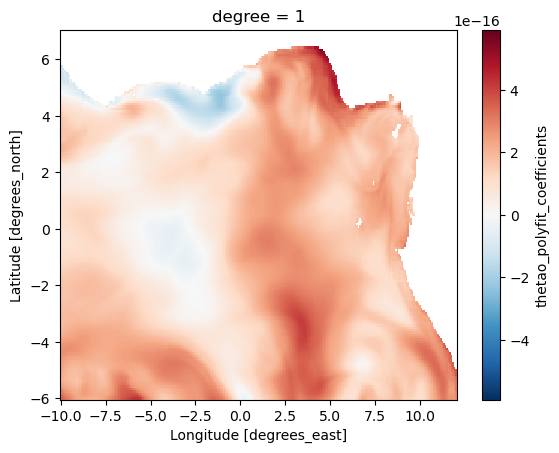

In [122]:
#data
fit = data.isel(depth=0).polyfit("time", deg=1)
fit

fit.thetao_polyfit_coefficients.sel(degree=1).plot()

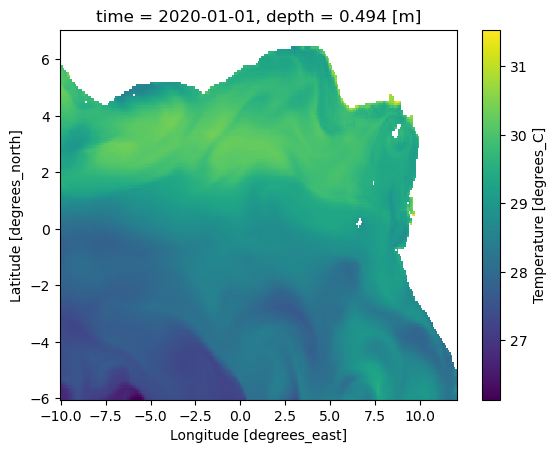

In [138]:
data.thetao.sel(time='2020-01-01').isel(depth=0).plot()

In [140]:
sst

<xarray.Dataset> Size: 369MB
Dimensions:       (time: 15639, bnds: 2, lon: 92, lat: 64)
Coordinates:
  * time          (time) datetime64[ns] 125kB 1981-09-01 ... 2024-08-06
  * lon           (lon) float32 368B -7.875 -7.625 -7.375 ... 14.38 14.62 14.88
  * lat           (lat) float32 256B -6.875 -6.625 -6.375 ... 8.375 8.625 8.875
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) object 250kB ...
    lon_bnds      (lon, bnds) float32 736B ...
    lat_bnds      (lat, bnds) float32 512B ...
    analysed_sst  (time, lat, lon) float32 368MB ...
Attributes: (12/49)
    CDI:                        Climate Data Interface version 2.4.0 (https:/...
    Conventions:                CF-1.6,ACDD-1.3
    source:                     AVHRR_Pathfinder-NODC-L3C-v5.1,ICOADS_SHIP-NC...
    institution:                NCEI
    product_version:            Version 2.0
    spatial_resolution:         0.25 degree
    ...                         ...
    standard_name_vocabulary:   CF Standard Name Table v29
    summary:                    NOAA's 1/4-degree Daily Optimum Interpolation...
    time_coverage_start:        19810901T000000Z
    time_coverage_end:          19810902T000000Z
    uuid:                       39832cc3-d409-438a-820e-2bb1b38ebca8
    CDO:                        Climate Data Operators version 2.4.0 (https:/...

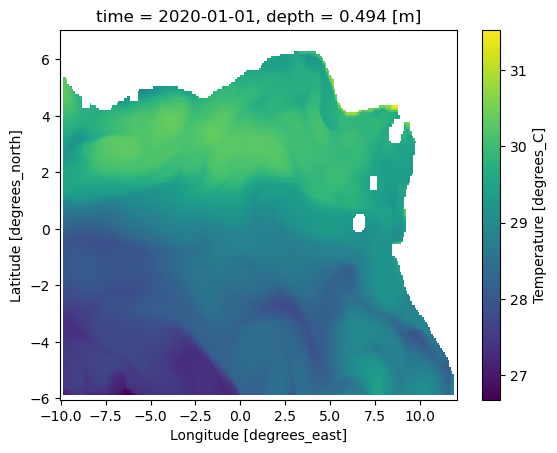

In [153]:
aa = data.thetao.rolling(longitude=5, latitude=5,center=True).max()

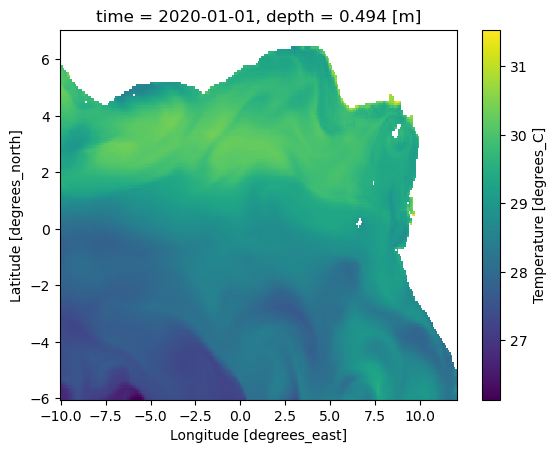

In [155]:
data.thetao.sel(time='2020-01-01').isel(depth=0).plot()

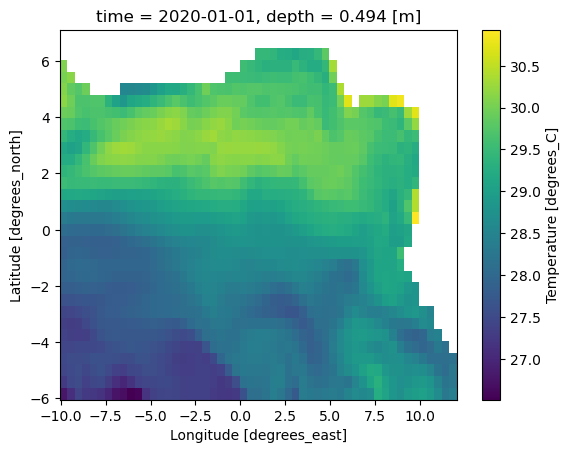

In [165]:
aa = data.thetao.coarsen(longitude=5, latitude=5,boundary='pad').mean()
aa.sel(time='2020-01-01').isel(depth=0).plot()

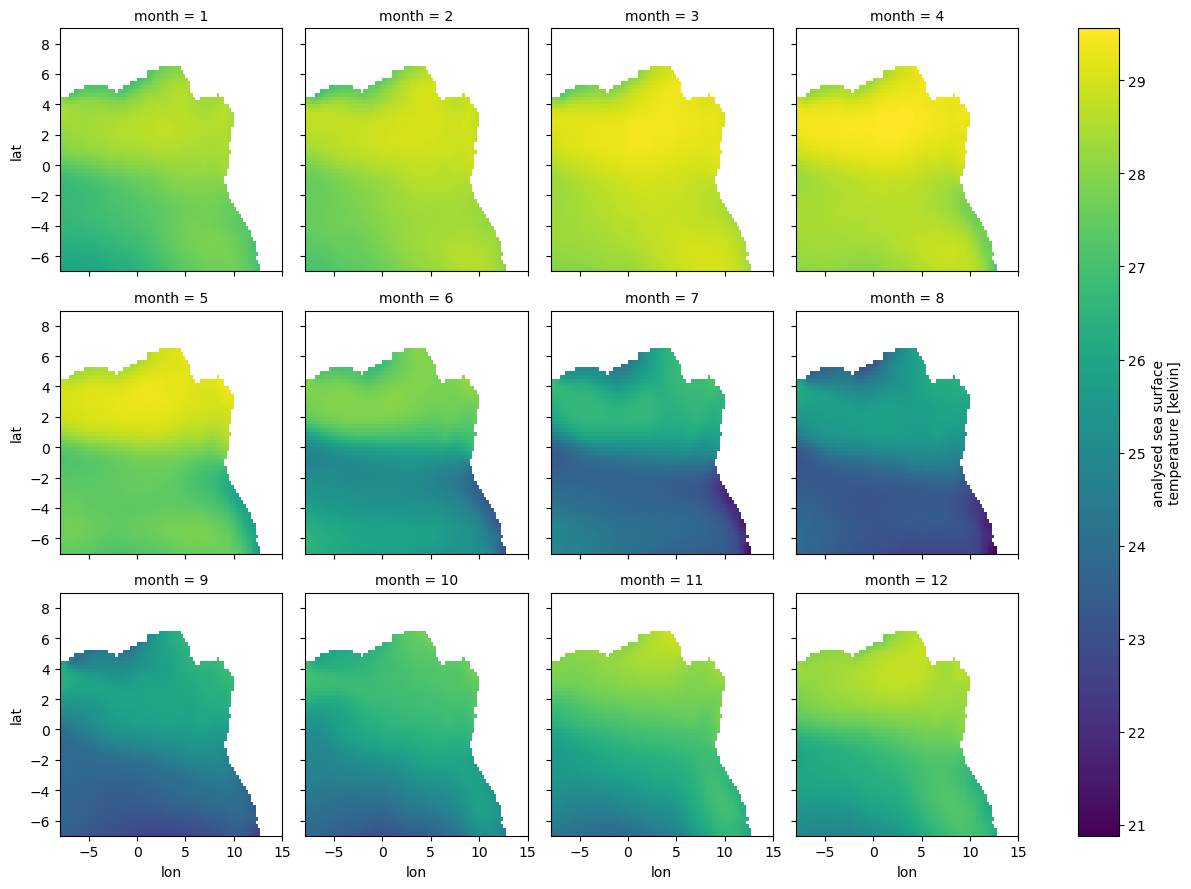

In [191]:
mois = sst.groupby('time.month').mean()
mois.analysed_sst.plot(col='month',col_wrap=4)

In [207]:
sst.time.to_dataframe()

,time
time,
1981-09-01,1981-09-01
1981-09-02,1981-09-02
1981-09-03,1981-09-03
1981-09-04,1981-09-04
1981-09-05,1981-09-05
...,...
2024-07-28,2024-07-28
2024-07-29,2024-07-29
2024-08-04,2024-08-04


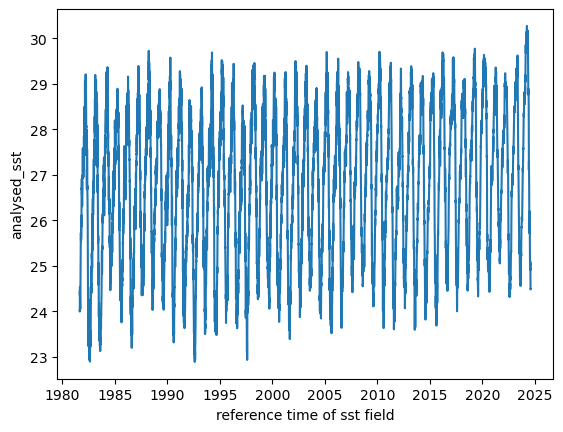

In [213]:
sst.analysed_sst.mean(['lon','lat']).plot()

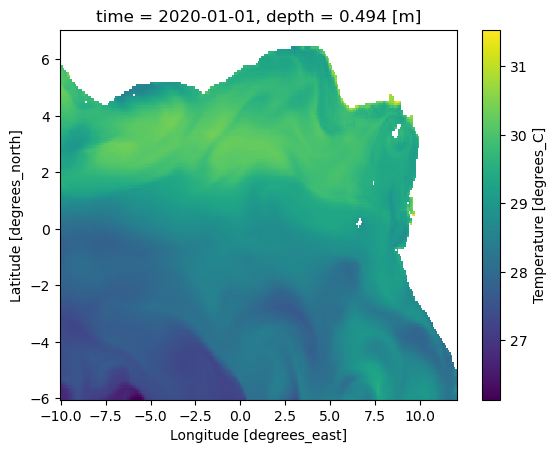

In [215]:
data.thetao.isel(time=0, depth=0).plot() 

(array([2.4030000e+03, 1.0787400e+05, 9.7551000e+05, 1.8022880e+06,
        2.1286030e+06, 2.6299470e+06, 1.4213159e+07, 1.2344202e+07,
        3.2756000e+04, 4.8600000e+02]),
 array([16.64415359, 18.40963745, 20.17512131, 21.94060326, 23.70608711,
        25.47157097, 27.23705482, 29.00253868, 30.76802063, 32.53350449,
        34.29898834]),
 <BarContainer object of 10 artists>)

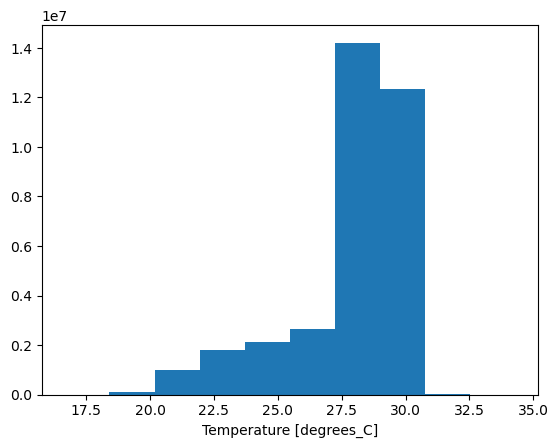

In [219]:
data.thetao.plot()

(array([3.8150000e+03, 1.7769600e+05, 3.5926340e+06, 1.0159698e+07,
        1.5927181e+07, 2.0231056e+07, 6.2024050e+06, 2.1428000e+04,
        9.7000000e+01, 2.9000000e+01]),
 array([17.74999428, 19.63999367, 21.52999306, 23.41999245, 25.30999184,
        27.19998932, 29.08998871, 30.9799881 , 32.86998749, 34.75998688,
        36.64998627]),
 <BarContainer object of 10 artists>)

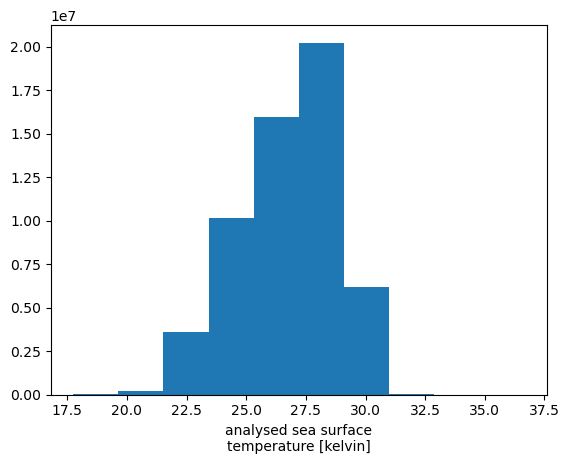

In [221]:
sst.analysed_sst.plot()

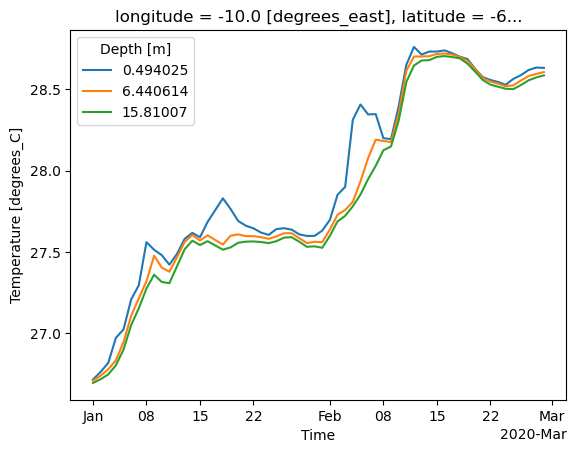

In [233]:
data.isel(longitude=0, latitude=0, depth=[0, 5, 10]).thetao.plot(hue='depth')

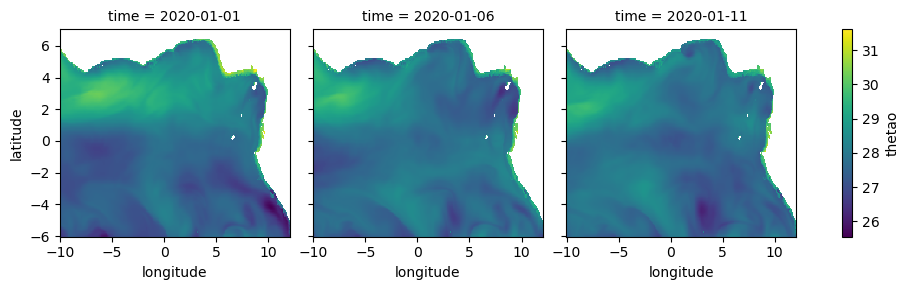

In [241]:
data.mean('depth').isel(time=[0, 5, 10]).thetao.plot(col='time')

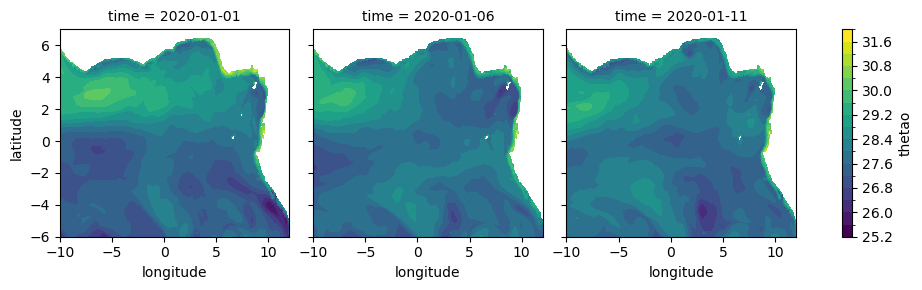

In [249]:
data.mean('depth').isel(time=[0, 5, 10]).thetao.plot.contourf(col='time',levels=20)

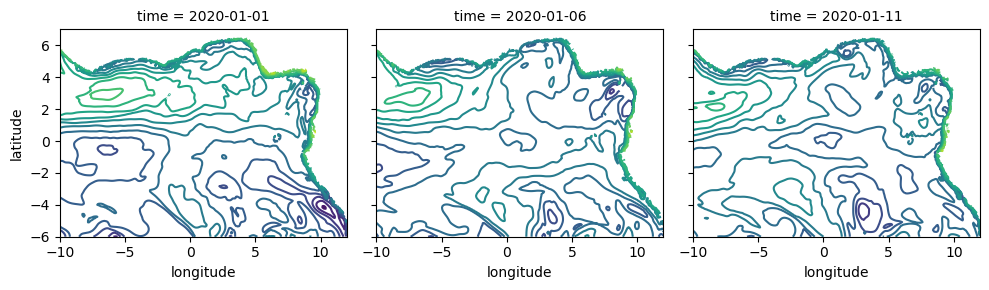

In [251]:
data.mean('depth').isel(time=[0, 5, 10]).thetao.plot.contour(col='time',levels=20)

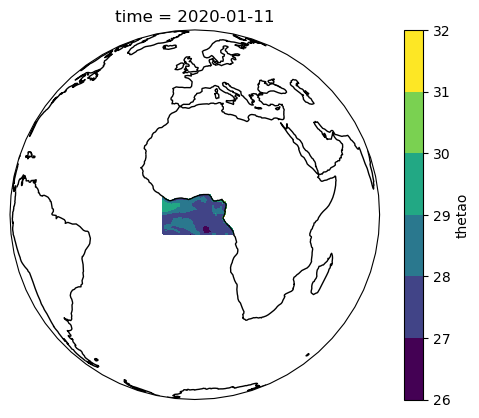

In [287]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

plt.figure
ax = plt.axes(projection=ccrs.Orthographic(0,0))
ax.set_global()
data2 = data.isel(time=[10]).thetao.mean('depth')
data2.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()


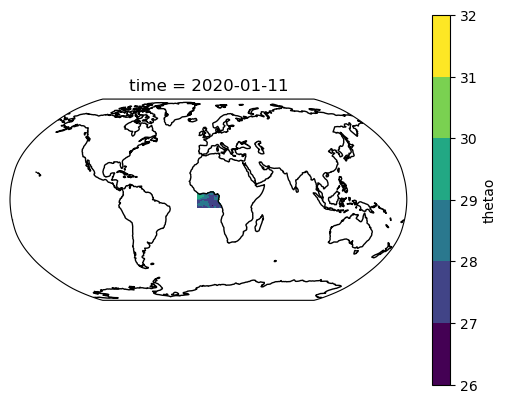

In [285]:

plt.figure
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
data2 = data.isel(time=[10]).thetao.mean('depth')
data2.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()


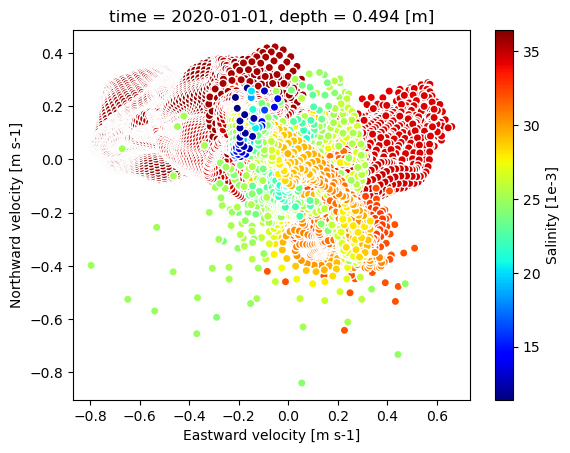

In [293]:
data.isel(time=0, depth=0).plot.scatter(x='uo', y='vo',hue='so',cmap='jet')

slice(2, 5, None)

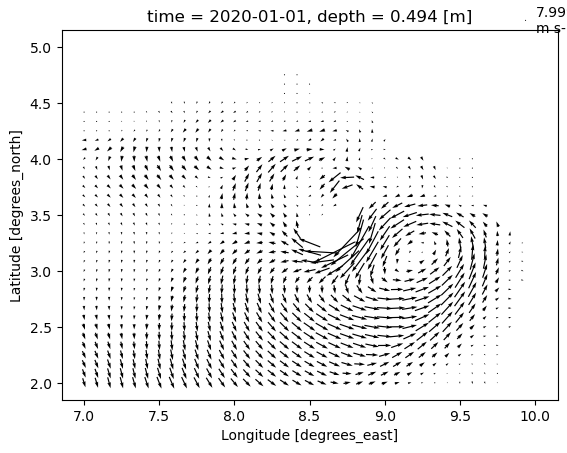

In [305]:
data.isel(time=0, depth=0).sel(latitude=slice(2,5),longitude=slice(7,10)).plot.quiver(x='longitude', y='latitude',u='uo',v='vo')
                                       

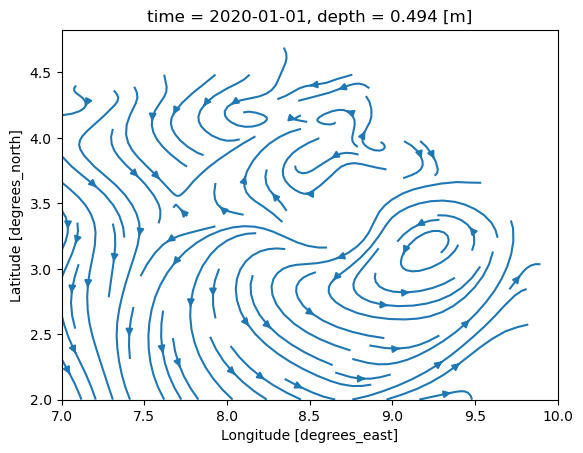

In [307]:
data.isel(time=0, depth=0).sel(latitude=slice(2,5),longitude=slice(7,10))\
    .plot.streamplot(x='longitude', y='latitude',u='uo',v='vo')


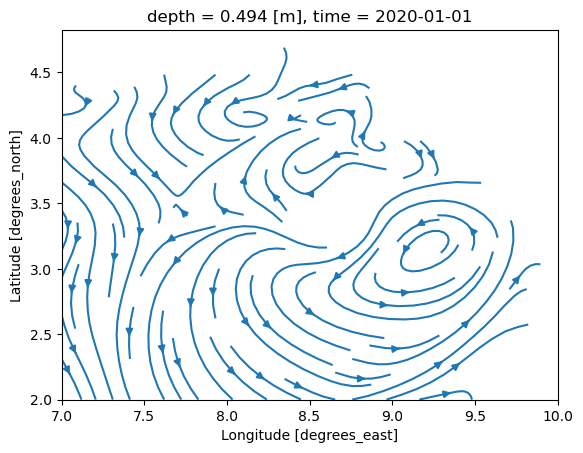

In [311]:
mf = xr.open_mfdataset('data/jan_fev/GG_cmems_data_202001*.nc')

mf.isel(time=0, depth=0).sel(latitude=slice(2,5),longitude=slice(7,10)).plot.streamplot(x='longitude', y='latitude',u='uo',v='vo')

